# **Que3**

# 1.

The only data that we have is the average of each column so we will be replacing the N/A with the mean of the column, and in this case, will be the mean of the "dribbling" and "pace".

In [51]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Access a file from your Drive
file_path = '/content/drive/My Drive/Colab Notebooks/FIFA2020.csv'

df = pd.read_csv(file_path, encoding = "ISO-8859-1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
mean_dribbling = int(df['dribbling'].mean())
mean_pace = int(df['pace'].mean())

# Replace None values with the mean
df['dribbling'].fillna(mean_dribbling, inplace=True)
df['pace'].fillna(mean_pace, inplace=True)

print(df.loc[8, 'dribbling'])
print(df.loc[9, 'dribbling'])
print(df.loc[10, 'dribbling'])
print(df.head())

65.0
69.0
90.0
   player_ID player_name          player_extended_name      quality revision  \
0          1        Pelé      Edson Arantes Nascimento  Gold - Rare     Icon   
1          2    Maradona                Diego Maradona  Gold - Rare     Icon   
2          3     Ronaldo  Ronaldo Luís Nazário de Lima  Gold - Rare     Icon   
3          4        Pelé      Edson Arantes Nascimento  Gold - Rare     Icon   
4          5    Maradona                Diego Maradona  Gold - Rare     Icon   

  origin  overall   club league nationality  ... gk_reflexes  gk_handling  \
0    NaN       98  Icons  Icons      Brazil  ...         NaN          NaN   
1    NaN       97  Icons  Icons   Argentina  ...         NaN          NaN   
2    NaN       96  Icons  Icons      Brazil  ...         NaN          NaN   
3    NaN       95  Icons  Icons      Brazil  ...         NaN          NaN   
4    NaN       95  Icons  Icons   Argentina  ...         NaN          NaN   

  gk_speed  gk_kicking  gk_positoning  pr

# 2.



We are showing the box plot of the "age" random variable.



We write the 5 major values of {min, Q1, Q2(median), Q3, max} and to explain each one of them, min and max in an array of numbers are obvious and for the rest, these are respectively the border of the first and the second quartile, the second and third quartile, and the third and last(fourth) quartile of the array meaning after sorting the array in ascending order these three numbers will divide the array into 4 quartiles of the same number of numbers. The first part is the least in terms of the numbers values and it goes up until the last or the fourth part(quartile). The max is in the $4th$ quartile and the min is in the $1st$ quartile.

In [53]:
max_age = df['age'].max()
min_age = df['age'].min()

q1_age = df['age'].quantile(1/4)
q2_age = df['age'].quantile(1/2)  # Median
q3_age = df['age'].quantile(3/4)

palyer_name_max_age = df.loc[df['age'] == max_age, 'player_extended_name'].values[0]
palyer_name_min_age = df.loc[df['age'] == min_age, 'player_extended_name'].values[0]

print("Player_name:", palyer_name_max_age, "  Max age:", max_age)
print("Player_name:", palyer_name_min_age, "  Min age:", min_age)
print("First quartile (Q1):", q1_age)
print("Second quartile (Q2 - Median):", q2_age)
print("Third quartile (Q3):", q3_age)

Player_name: Lev Yashin   Max age: 88
Player_name: Alphonso Davies   Min age: 17
First quartile (Q1): 23.0
Second quartile (Q2 - Median): 26.0
Third quartile (Q3): 30.0


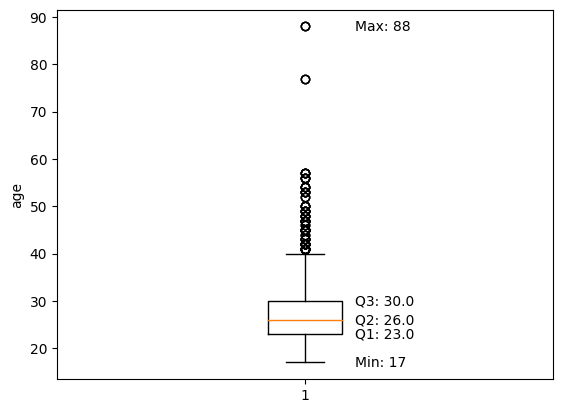

In [54]:
import matplotlib.pyplot as plt

plt.boxplot(df['age'])
plt.ylabel('age')

# Annotations
plt.text(1.1, q1_age, f'Q1: {q1_age}', va='center', ha='left')
plt.text(1.1, q2_age, f'Q2: {q2_age}', va='center', ha='left')
plt.text(1.1, q3_age, f'Q3: {q3_age}', va='center', ha='left')
plt.text(1.1, min_age, f'Min: {min_age}', va='center', ha='left')
plt.text(1.1, max_age, f'Max: {max_age}', va='center', ha='left')

plt.show()

# 3.

a/

In [55]:
import numpy as np
import random

def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

set_seed(810109203)

In [56]:
randoms_weight = np.array(random.sample(df['weight'].tolist(), 100))

weight_mean = randoms_weight.mean()
weight_var = randoms_weight.var()
weight_std = randoms_weight.std()

print("Mean(average): ", weight_mean)
print("Variance: ", weight_var)
print("Standard deviation: ", weight_std)

Mean(average):  74.41
Variance:  45.8219
Standard deviation:  6.7691875435682825


b/

The Q-Q plot (Quantile-Quantile plot) is a graphical tool used to compare the distribution of two datasets. It provides a visual assessment of how similar the distributions are. In a Q-Q plot, the quantiles of the observed data are plotted against the quantiles of the expected distribution. If the two distributions are similar, the points in the Q-Q plot will fall approximately along a straight line (the 45-degree line).

c/

Using the variance and the mean of the 'a' part that we found I will make a normal distribution with those parameters and a sample size of 100 to compare these two (theoretical and experimental sample) using the Q-Q plot and how much they get closer to the 45-degree line these two have a better match.

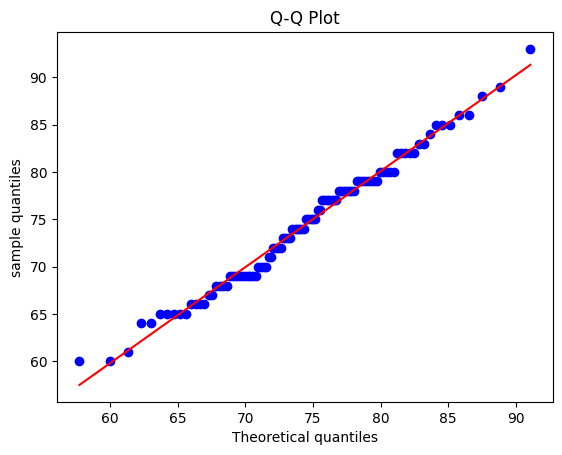

In [57]:
import scipy.stats as stats


# Q-Q plot
stats.probplot(randoms_weight, dist="norm", sparams=(weight_mean, weight_std), plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('sample quantiles')
plt.show()

The x-axis is the quantile of the theoretical form that is the noramal distribtuion.

The y-axis is the quantile of the 100 sample of the column weight that we had.

The 45-degree line is the thing we compare the dots to.

As we can see from the above plot the dots are realy close to the line so this means the sample is realy near to a normal distribution, so we can conclude that the the column weight has a normal distribution.

d/

The p-value is a measure of the evidence against a null hypothesis. In the case of the Shapiro-Wilk test, if the p-value is greater than the chosen significance level (commonly 0.05), then we fail to reject the null hypothesis, and we can accept that the data follows a normal distribution.

In [58]:
import scipy.stats as stats
statistic, p_value = stats.shapiro(randoms_weight)

print("p_value: ", p_value)
if p_value > 0.05:
    print("We can't reject the null hypophesis, in this case it means the weight of the players is a normal distribution")
else:
    print("We reject the null hypophesis, so in this case the weight of the players doesn't follow a normal distribution")

p_value:  0.41596418619155884
We can't reject the null hypophesis, in this case it means the weight of the players is a normal distribution


e/



In [59]:
def _3(n: int):
  randoms_weight = np.array(random.sample(df['weight'].tolist(), n))

  weight_mean = randoms_weight.mean()
  weight_var = randoms_weight.var()
  weight_std = randoms_weight.std()

  print("Mean(average): ", weight_mean)
  print("Variance: ", weight_var)
  print("Standard deviation: ", weight_std)


  import scipy.stats as stats


  # Q-Q plot
  stats.probplot(randoms_weight, dist="norm", sparams=(weight_mean, weight_std), plot=plt)
  plt.title('Q-Q Plot')
  plt.xlabel('Theoretical quantiles')
  plt.ylabel('sample quantiles')
  plt.show()


  import scipy.stats as stats
  statistic, p_value = stats.shapiro(randoms_weight)

  print("p_value: ", p_value)
  if p_value > 0.05:
      print("We can't reject the null hypophesis, in this case it means the weight of the players is a normal distribution")
  else:
      print("We reject the null hypophesis, so in this case the weight of the players doesn't follow a normal distribution")

Mean(average):  74.992
Variance:  48.103936000000004
Standard deviation:  6.935700108857072


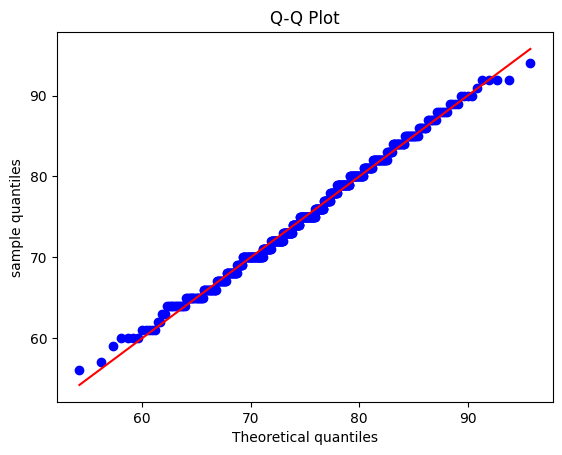

p_value:  0.03571292757987976
We reject the null hypophesis, so in this case the weight of the players doesn't follow a normal distribution


In [60]:
# n = 500
_3(500)

Mean(average):  75.59
Variance:  49.5029
Standard deviation:  7.035829730742494


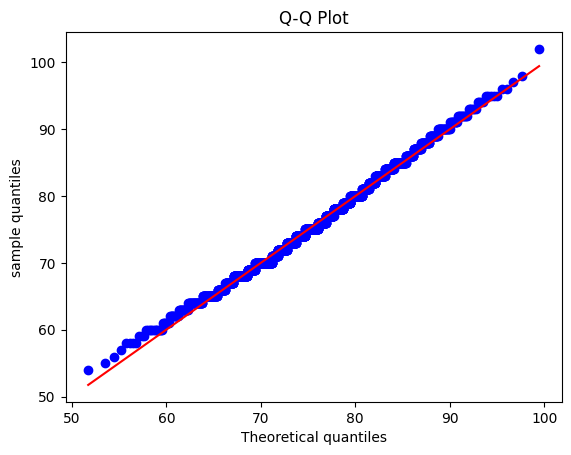

p_value:  8.379627729482308e-07
We reject the null hypophesis, so in this case the weight of the players doesn't follow a normal distribution


In [61]:
# n = 2000
_3(2000)

As we can see the bigger the sample size gets, the p-value decreases.

This means that with a larger sample size, the test becomes more sensitive to deviations from the normal distribution. In other words, a larger sample size provides more information and allows for a more accurate assessment of the normality of the data.

# 4.

a/



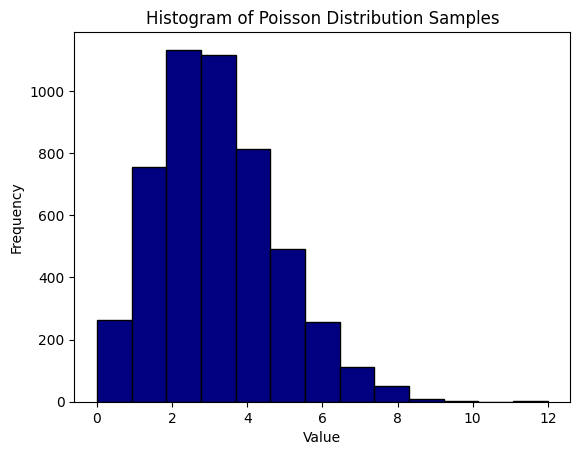

In [62]:
samples = np.random.poisson(lam=3, size=5000)

# Show the histogram
plt.hist(samples, bins=13, color='navy', edgecolor='black')
plt.title('Histogram of Poisson Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [63]:
def test_normal(n: int):
  samples = np.random.poisson(lam=3, size=n)

  sample_mean = samples.mean()
  sample_std = samples.std()

  import scipy.stats as stats


  # Q-Q plot
  stats.probplot(samples, dist="norm", sparams=(sample_mean, sample_std), plot=plt)
  plt.title('Q-Q Plot')
  plt.xlabel('Theoretical quantiles')
  plt.ylabel('sample quantiles')
  plt.show()


  statistic, p_value = stats.shapiro(samples)

  print("p_value: ", p_value)
  if p_value > 0.05:
      print(f"We can't reject the null hypophesis, in this case it means the {n} samples of the poisson distribution can be counted as a normal distribution")
  else:
      print("We reject the null hypophesis, so in this case it means the {n} samples of the poisson distribution can't be counted as a normal distribution")

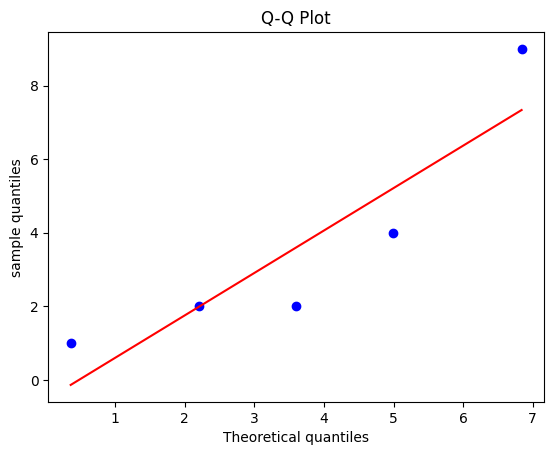

p_value:  0.10961208492517471
We can't reject the null hypophesis, in this case it means the 5 samples of the poisson distribution can be counted as a normal distribution


In [64]:
test_normal(n=5)

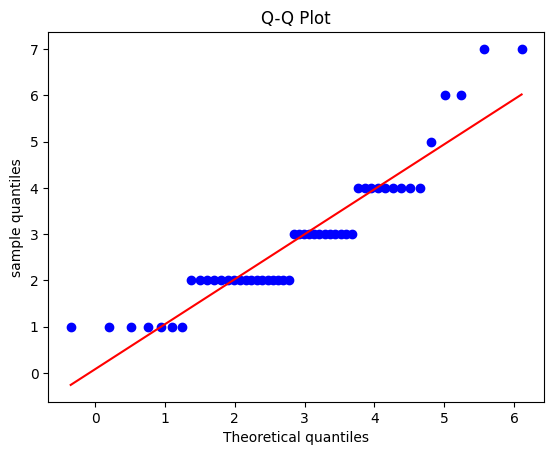

p_value:  8.079884719336405e-05
We reject the null hypophesis, so in this case it means the {n} samples of the poisson distribution can't be counted as a normal distribution


In [65]:
test_normal(n=50)

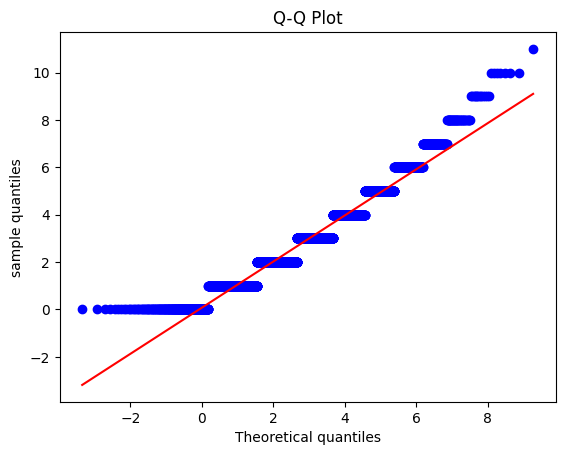

p_value:  9.394981731991843e-39
We reject the null hypophesis, so in this case it means the {n} samples of the poisson distribution can't be counted as a normal distribution


In [66]:
test_normal(n=5000)

Exactly like the last part, we can see the bigger the sample size gets, the p-value decreases.

This means that with a larger sample size, the test becomes more sensitive to deviations from the normal distribution. In other words, a larger sample size provides more information and allows for a more accurate assessment of the normality of the data.

So in a way we can conclude that the "Shapiro Wilk" test, isn't a great test for large sample sizes because originaly the CLT would suggest that the sample size gets bigger and we have more of different random variables the it will more look like a normal distribution despite here seeing the exact opposite in the results.